<a href="https://colab.research.google.com/github/ChrisMadem/Hello-World/blob/master/site/en/tutorials/quickstart/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [13]:
# LSTM Time Series Forecasting on ^NDX Close Prices

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [66]:
import datetime


In [14]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [29]:
from google.colab import drive


In [32]:
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
from google.colab import drive
from google.colab import files
import pandas as pd
import os

drive.mount('/content/drive')

# Check if file exists
file_path = '/content/drive/My Drive/My Folder/ticker2.csv'
if os.path.exists(file_path):
  df = pd.read_csv(filepath_or_buffer=file_path, header=None)
else:
  print(f"File not found at: {file_path}")
  print("Please upload the 'ticker2.csv' file:")
  uploaded = files.upload() # Upload the file using google.colab.files
  # Assuming the uploaded file is named 'ticker2.csv'
  if 'ticker2.csv' in uploaded:
    df = pd.read_csv('ticker2.csv', header=None) # Read the uploaded file
  else:
    print("Upload failed or incorrect file uploaded.")
    # You might want to raise an exception or handle this scenario differently

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File not found at: /content/drive/My Drive/My Folder/ticker2.csv
Please upload the 'ticker2.csv' file:


Saving ticker2.csv to ticker2.csv


In [57]:
# Load the CSV file
df = pd.read_csv('ticker2.csv', header=None)


In [59]:
# Assign column names manually if needed
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker','Open', 'High', 'Low', 'Close', 'Volume','Open', 'High', 'Low', 'Close', 'Volume','Open', 'High', 'Low', 'Close', 'Volume',]

In [60]:
df.head()

,Date,Open,High,Low,Close,Volume,Ticker,Open,High,Low,...,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
0,2007-01-03,1769.22,1793.05,1731.71,1759.37,2.435280e+09,^NDX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-01-04,1763.15,1799.07,1757.00,1792.91,2.104210e+09,^NDX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-01-05,1787.79,1787.79,1770.29,1785.30,2.060360e+09,^NDX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-01-08,1786.39,1795.45,1776.99,1787.14,1.905620e+09,^NDX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-01-09,1791.75,1802.44,1776.73,1795.63,2.144160e+09,^NDX,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_ndx = df[df['Ticker'] == '^NDX']

In [62]:
df_ndx = df_ndx.dropna(axis=1, how='all')

In [64]:
df_ndx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4617 entries, 0 to 4616
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4617 non-null   object 
 1   Open    4617 non-null   float64
 2   High    4617 non-null   float64
 3   Low     4617 non-null   float64
 4   Close   4617 non-null   float64
 5   Volume  4617 non-null   float64
 6   Ticker  4617 non-null   object 
dtypes: float64(5), object(2)
memory usage: 288.6+ KB


In [68]:
df_ndx['Date'] = pd.to_datetime(df_ndx['Date'])

In [69]:
df_ndx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4617 entries, 0 to 4616
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4617 non-null   datetime64[ns]
 1   Open    4617 non-null   float64       
 2   High    4617 non-null   float64       
 3   Low     4617 non-null   float64       
 4   Close   4617 non-null   float64       
 5   Volume  4617 non-null   float64       
 6   Ticker  4617 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 288.6+ KB


In [70]:
# Try importing TensorFlow with error handling
try:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
except ImportError as e:
    print("\nTensorFlow import failed. Make sure TensorFlow is correctly installed.")
    print("Visit: https://www.tensorflow.org/install for installation instructions.")
    raise e

If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [74]:
# Assuming df_ndx is your DataFrame with stock market data

# 1. Select the 'Close' price as your target variable
data = df_ndx['Close'].values.reshape(-1, 1)

# 2. Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# 3. Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% for training
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

# 4. Create a function to prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# 5. Set the look_back period (number of previous days to consider)
look_back = 100

# 6. Create the training and testing datasets
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# 7. Reshape the input data to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now you have X_train, Y_train, X_test, Y_test ready for your LSTM model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ... (Previous code for data loading and preprocessing) ...

# 1. Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# 2. Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# 3. Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32) # Adjust epochs and batch_size as needed

# 4. Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 5. Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# ... (Further steps for evaluation and visualization) ...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - loss: 0.0114
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 5.9750e-05
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 7.7654e-05
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - loss: 5.7715e-05
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - loss: 7.3639e-05
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 6.9908e-05
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 7.5633e-05
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 4.8452e-05
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - loss: 5.7915e-05
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 9.4375e-05
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 4.7268e-05
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 5.4665e-05
Epoch 13/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 5.2110e-05
Epoch 14/100
113/113 ━━━━━━━━━━━━━━━━

Train RMSE: 88.49 RMSE
Test RMSE: 280.52 RMSE


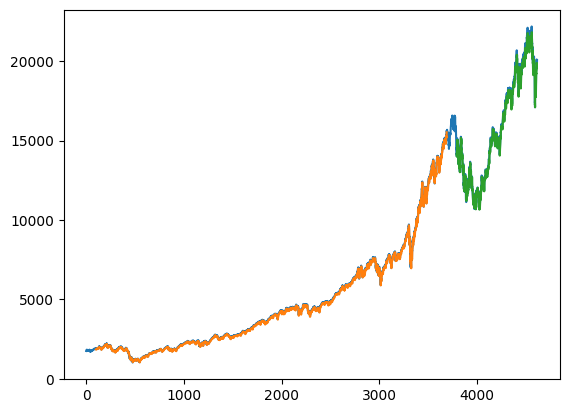

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code for data loading, preprocessing, model building, and training) ...

# Evaluation and Visualization:

# 1. Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(np.mean(((Y_train[0] - train_predict[:,0]) ** 2)))
test_rmse = np.sqrt(np.mean(((Y_test[0] - test_predict[:,0]) ** 2)))
print('Train RMSE: %.2f RMSE' % (train_rmse))
print('Test RMSE: %.2f RMSE' % (test_rmse))

# 2. Plot the predictions
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
